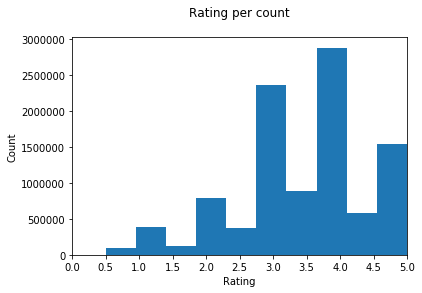

In [2]:
import findspark
findspark.init()

import pyspark
import sys
import re
import random
import pandas as pd

from pyspark import SparkConf, SparkContext
%matplotlib inline
import matplotlib.pyplot as plt
import re


sc=SparkContext(appName = "MovieRatingGraph2")
lines = sc.textFile("/data/movie-ratings/ratings.dat")
data = lines.map(lambda x: re.split(r'::', x)) 
ratings = data.map(lambda x:float(x[2]))
users =ratings.map(lambda x: (x,1)) 
users_grouped = users.reduceByKey(lambda a,b: (a+b)) 

datasorted=users_grouped.sortByKey(ascending=True)

plt.title("Count per rating\n")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.hist(ratings.take(ratings.count()))

#configure  X axes
plt.xlim(0,5)
plt.xticks([0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5])


plt.show()

sc.stop()

# plt.barh(datay.take(5), width=5, align='center', alpha=0.4)
# plt.show()
# # plt.barh(datay, datax, width=0.35, color='#d62728')


#plt.bar(datax, datay, align='center')
#plt.xlabel('Rating')
#ply.ylabel('Frequency')
#plt.show()